<a href="https://colab.research.google.com/github/2021BUSTER/deep_learning_yeji/blob/main/01_part1_part2_part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#선형 회귀 실습 01

>01_Linear_Square_Method
  
  - 최소 제곱법으로 예측선 찾기(직선)


In [ ]:
import numpy as np

# x값과 y값
x=[2,4,6,8]
y=[81,93,91,97]

# x와 y의 평균값
mx = np.mean(x)
my = np.mean(y)
print("x의 평균값:",mx)
print("y의 평균값:",my)

# 기울기 공식의 분모
divisor = sum([(mx - i)**2 for i in x])

# 기울기 공식의 분자
def top(x,mx,y,my):
  d=0
  for i in range(len(x)):
    d += (x[i] - mx) * (y[i] - my)
  return d
dividend = top(x,mx,y,my)

print("분모:",divisor)
print("분자:",dividend)

# 기울기와 y절편 구하기
a = dividend / divisor
b = my - (mx*a)

#출력으로 확인
print("기울기 a = ",a)
print("y 절편 b = ",b)

x의 평균값: 5.0
y의 평균값: 90.5
분모: 20.0
분자: 46.0
기울기 a =  2.3
y 절편 b =  79.0


#선형 회귀 실습 02

>01_Linear_Square_Error
  
  - 평균제곱오차(MES)구하기


In [ ]:
import numpy as np

# 기울기 a와 y절편 b
fake_a_b = [3, 76]

# x,y의 데이터 값
data = [[2,81],[4,93],[6,91],[8,97]]
x=[i[0] for i in data]
y=[i[1] for i in data]

# y = ax + b에 a와 b 값을 대입하여 결과를 출력하는 함수
def predict(x):
  return fake_a_b[0]*x + fake_a_b[1]

# MSE함수
def mse(y, y_hat):
  return (((y-y_hat)**2).mean())

#MSE함수를 각 y값에 대입하여 최종 값을 구하는 함수
def mse_val(y,predict_result):
  return mse(np.array(y),np.array(predict_result))

# 예측 값이 들어갈 빈 리스트
predict_result = []

# 모든 x값을 한 번씩 대입하여
for i in range(len(x)):
  # predict_result 리스트 와성
  predict_result.append(predict(x[i]))
  print("공부한 시간 = %.f, 실제 점수 = %.f, 예측점수 = %.f" %(x[i],y[i],predict(x[i])))

#최종 MSE 출력
print("mse 최종값: "+str(mse_val(predict_result,y)))

공부한 시간 = 2, 실제 점수 = 81, 예측점수 = 82
공부한 시간 = 4, 실제 점수 = 93, 예측점수 = 88
공부한 시간 = 6, 실제 점수 = 91, 예측점수 = 94
공부한 시간 = 8, 실제 점수 = 97, 예측점수 = 100
mse 최종값: 11.0


#오차수정하기 : 경사하강법


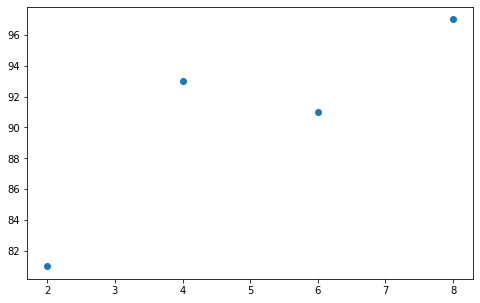

epoch=0, 기울기=23.2000, 절편=4.5250
epoch=100, 기울기=7.9316, 절편=45.3932
epoch=200, 기울기=4.7953, 절편=64.1094
epoch=300, 기울기=3.4056, 절편=72.4022
epoch=400, 기울기=2.7899, 절편=76.0766
epoch=500, 기울기=2.5171, 절편=77.7047
epoch=600, 기울기=2.3962, 절편=78.4261
epoch=700, 기울기=2.3426, 절편=78.7457
epoch=800, 기울기=2.3189, 절편=78.8873
epoch=900, 기울기=2.3084, 절편=78.9501
epoch=1000, 기울기=2.3037, 절편=78.9779
epoch=1100, 기울기=2.3016, 절편=78.9902
epoch=1200, 기울기=2.3007, 절편=78.9957
epoch=1300, 기울기=2.3003, 절편=78.9981
epoch=1400, 기울기=2.3001, 절편=78.9991
epoch=1500, 기울기=2.3001, 절편=78.9996
epoch=1600, 기울기=2.3000, 절편=78.9998
epoch=1700, 기울기=2.3000, 절편=78.9999
epoch=1800, 기울기=2.3000, 절편=79.0000
epoch=1900, 기울기=2.3000, 절편=79.0000
epoch=2000, 기울기=2.3000, 절편=79.0000


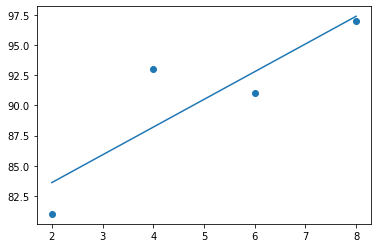

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 공부 시간 x, 성적 y의 리스트
data = [[2,81],[4,93],[6,91],[8,97]]
x=[i[0] for i in data]
y=[i[1] for i in data]

#그래프로 나타내기
plt.figure(figsize=(8,5))
plt.scatter(x,y)
plt.show()

#리스트로 되어 있는 x와 y값을 넘파이 배열로 바꾸기(인덱스를 주어 하나씩 불러와 게산이 가능하게 하기 위함)
x_data=np.array(x)
y_data=np.array(y)

# 기울기 a와 절편 b 값 초기화
a=0
b=0

# 학습률 정하기 (값을 바꾸면서 최적의 학습률을 찾는 것이 관건임)
lr = 0.05

#몇번 반복될지 설정(0부터 원하는 반복 횟수에 +1)
epochs=2001  # eposhs : 입력한 값에 대해 몇번이나 반복을 실험했는지 나타냄

#경사 하강법
for i in range(epochs):
  y_pred=a*x_data+b # y=ax+b
  error=y_data-y_pred #오차
  
  #오차 함수를 a로 미분한 값                   # MSE = 1/n sum(y_pred-ydata)
  a_diff=-(1/len(x_data))*sum(x_data*(error))  # 2/n sum(ax+b-y)x
  #평균 제곱 오차를 b로 미분한 값
  b_diff=-(1/len(x_data))*sum(y_data-y_pred)   # 2/n sum(ax+b-y)

  a=a-lr*a_diff #학습률을 곱해 기존의 a,b 값 업데이트
  b=b-lr*b_diff 

  if i%100==0:
    print("epoch=%.f, 기울기=%.04f, 절편=%.04f" %(i,a,b))

  #앞서 구한 기울기와 절편을 이용해 그래프 다시 그리기
y_pred=a*x_data+b
plt.scatter(x,y)
plt.plot([min(x_data),max(x_data)],[min(y_pred),max(y_pred)])
plt.show()


#다중 선형 회귀 실습
> 더 정밀한 예측 (3D)


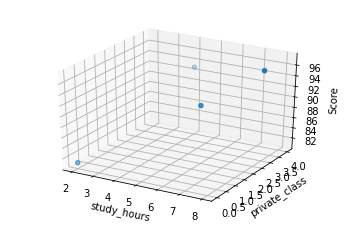

epoch=0, 기울기1=23.2000,기울기2=10.5625, 절편=4.5250
epoch=100, 기울기1=6.4348,기울기2=3.9893, 절편=43.9757
epoch=200, 기울기1=3.7255,기울기2=3.0541, 절편=62.5766
epoch=300, 기울기1=2.5037,기울기2=2.6323, 절편=70.9656
epoch=400, 기울기1=1.9527,기울기2=2.4420, 절편=74.7491
epoch=500, 기울기1=1.7042,기울기2=2.3562, 절편=76.4554
epoch=600, 기울기1=1.5921,기울기2=2.3175, 절편=77.2250
epoch=700, 기울기1=1.5415,기울기2=2.3001, 절편=77.5720
epoch=800, 기울기1=1.5187,기울기2=2.2922, 절편=77.7286
epoch=900, 기울기1=1.5084,기울기2=2.2886, 절편=77.7992
epoch=1000, 기울기1=1.5038,기울기2=2.2870, 절편=77.8310
epoch=1100, 기울기1=1.5017,기울기2=2.2863, 절편=77.8453
epoch=1200, 기울기1=1.5008,기울기2=2.2860, 절편=77.8518
epoch=1300, 기울기1=1.5003,기울기2=2.2858, 절편=77.8547
epoch=1400, 기울기1=1.5002,기울기2=2.2858, 절편=77.8561
epoch=1500, 기울기1=1.5001,기울기2=2.2857, 절편=77.8567
epoch=1600, 기울기1=1.5000,기울기2=2.2857, 절편=77.8569
epoch=1700, 기울기1=1.5000,기울기2=2.2857, 절편=77.8570
epoch=1800, 기울기1=1.5000,기울기2=2.2857, 절편=77.8571
epoch=1900, 기울기1=1.5000,기울기2=2.2857, 절편=77.8571
epoch=2000, 기울기1=1.5000,기울기2=2.2857, 절편=77.8571


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

#공부 시간 x와 성적 y의 리스트 만들기
data=[[2,0,81],[4,4,93],[6,2,91],[8,3,97]]
x1=[i[0] for i in data]
x2=[i[1] for i in data]
y=[i[2] for i in data]

#그래프로 확인
ax=plt.axes(projection='3d')
ax.set_xlabel('study_hours')
ax.set_ylabel('private_class')
ax.set_zlabel('Score')
ax.dist=11
ax.scatter(x1,x2,y)
plt.show()

#리스트로 되어 있는 x와 y값을 넘파이 배열로 바꾸기(인덱스를 주어 하나씩 불러와 게산이 가능하게 하기 위함)
x1_data=np.array(x1)
x2_data=np.array(x2)
y_data=np.array(y)

# 기울기 a와 절편 b 값 초기화
a1=0
a2=0
b=0

# 학습률 정하기 (값을 바꾸면서 최적의 학습률을 찾는 것이 관건임)
lr = 0.05

#몇번 반복될지 설정(0부터 원하는 반복 횟수에 +1)
epochs=2001  # eposhs : 입력한 값에 대해 몇번이나 반복을 실험했는지 나타냄

#경사 하강법
for i in range(epochs):
  y_pred=a1*x1_data+a2*x2_data+b # y=a1x+a2x+b
  error=y_data-y_pred #오차
  
  #오차 함수를 a1로 미분한 값                   # MSE = 1/n sum(y_pred-ydata)
  a1_diff=-(1/len(x1_data))*sum(x1_data*(error))  # 2/n sum(a1x1+b-y)x1
  #오차 함수를 a1로 미분한 값     
  a2_diff=-(1/len(x2_data))*sum(x2_data*(error))  # 2/n sum(a2x1+b-y)x1
  #평균 제곱 오차를 b로 미분한 값
  b_diff=-(1/len(x1_data))*sum(y_data-y_pred)   # 2/n sum(ax+b-y)

  a1=a1-lr*a1_diff #학습률을 곱해 기존의 a,b 값 업데이트
  a2=a2-lr*a2_diff
  b=b-lr*b_diff 

  if i%100==0:
    print("epoch=%.f, 기울기1=%.04f,기울기2=%.04f, 절편=%.04f" %(i,a1,a2,b))



#로지스틱 회귀
> 참 or 거짓


epoch=0, 기울기=-0.0500, 절편=-0.0250
epoch=0, 기울기=-0.1388, 절편=-0.0472
epoch=0, 기울기=-0.2268, 절편=-0.0619
epoch=0, 기울기=0.1201, 절편=-0.0185
epoch=0, 기울기=0.2374, 절편=-0.0068
epoch=0, 기울기=0.2705, 절편=-0.0040
epoch=0, 기울기=0.2860, 절편=-0.0029
epoch=1000, 기울기=1.4978, 절편=-9.9401
epoch=1000, 기울기=1.4940, 절편=-9.9411
epoch=1000, 기울기=1.4120, 절편=-9.9547
epoch=1000, 기울기=1.4949, 절편=-9.9444
epoch=1000, 기울기=1.4982, 절편=-9.9440
epoch=1000, 기울기=1.4984, 절편=-9.9440
epoch=1000, 기울기=1.4985, 절편=-9.9440
epoch=2000, 기울기=1.9065, 절편=-12.9489
epoch=2000, 기울기=1.9055, 절편=-12.9491
epoch=2000, 기울기=1.8515, 절편=-12.9581
epoch=2000, 기울기=1.9057, 절편=-12.9514
epoch=2000, 기울기=1.9068, 절편=-12.9513
epoch=2000, 기울기=1.9068, 절편=-12.9513
epoch=2000, 기울기=1.9068, 절편=-12.9513


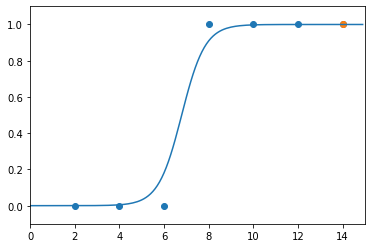

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#공부 시간 x와 성적 y의 리스트 만들기
data=[[2,0],[4,0],[6,0],[8,1],[10,1],[12,1],[14,1]]
x_data=[i[0] for i in data]
y_data=[i[1] for i in data]

#그래프로 나타내기
plt.scatter(x_data,y_data)
plt.xlim(0,15)
plt.ylim(-.1,1.1)

# 기울기 a와 절편 b 값 초기화
a=0
b=0

# 학습률 정하기 (값을 바꾸면서 최적의 학습률을 찾는 것이 관건임)
lr = 0.05

#시그모이드 함수 정의
def sigmoid(x):
  return 1/(1+np.e**(-x))

#경사 하강법
for i in range(2001):
  for x_data, y_data in data:
      a_diff=x_data*(sigmoid(a*x_data+b)-y_data)
      b_diff=sigmoid(a*x_data+b)-y_data
      a=a-lr*a_diff #학습률을 곱해 기존의 a,b 값 업데이트
      b=b-lr*b_diff 

      if i%1000==0:
         print("epoch=%.f, 기울기=%.04f, 절편=%.04f" %(i,a,b))

  #앞서 구한 기울기와 절편을 이용해 그래프 그리기
plt.scatter(x_data,y_data)
plt.xlim(0,15)
plt.ylim(-.1,1.1)
x_range=(np.arange(0,15,0.1))  #그래프로 나타낼 x값의 범위 정하기
plt.plot(np.arange(0,15,0.1),np.array([sigmoid(a*x+b) for x in x_range]))
plt.show()

#다중 퍼셉트론

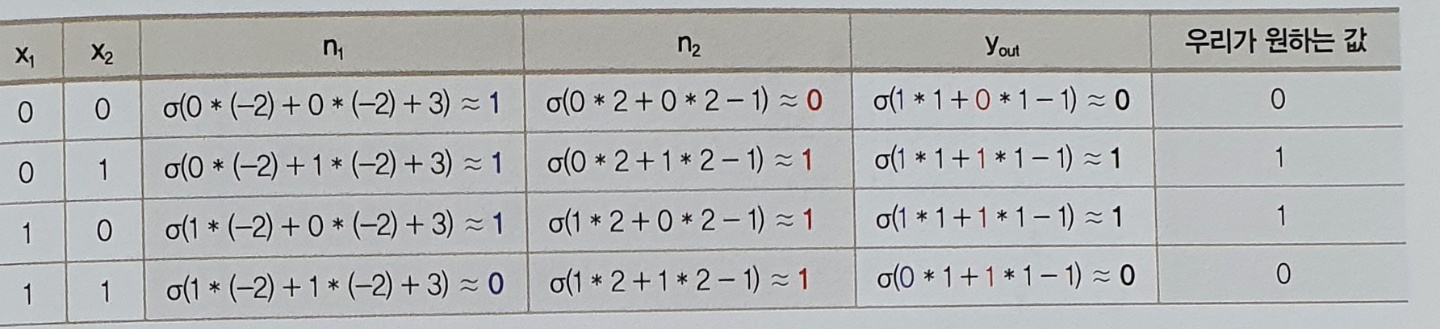

In [2]:
# 다중 퍼셉트론으로 XOR문제 해결하기

import numpy as np

#가중치와 바이어스
w11 = np.array([-2,-2])
w12=np.array([2,2])
w2=np.array([1,1])
b1=3
b2=-1
b3=-1

#퍼셉트론
def MLP(x,w,b):
  y=np.sum(w*x)+b
  if y<=0:
    return 0
  else:
    return 1

#NAND 게이트 (n1)
def NAND(x1,x2):
  return MLP(np.array([x1,x2]),w11,b1)

#OR 게이트 (n2)
def OR(x1,x2):
  return MLP(np.array([x1,x2]),w12,b2)

#AND 게이트
def AND(x1,x2):
  return MLP(np.array([x1,x2]),w2,b3)

#XOR 게이트 (yout)
def XOR(x1,x2):
  return AND(NAND(x1,x2),OR(x1,x2))

#x1,x2값
if __name__=='__main__':
  for x in [(0,0),(1,0),(0,1),(1,1)]:
    y=XOR(x[0],x[1])
    print("입력 값: "+str(x)+"출력 값: "+str(y))


입력 값: (0, 0)출력 값: 0
입력 값: (1, 0)출력 값: 1
입력 값: (0, 1)출력 값: 1
입력 값: (1, 1)출력 값: 0
